# LISST Data Review

In [1]:
import os, sys, re, ast
import pandas as pd
import numpy as np
import xarray as xr

from ooi_data_explorations.combine_data import combine_datasets
from ooi_data_explorations.common import load_kdata
from ooi_data_explorations.uncabled.process_flort import flort_datalogger

from ooinet import M2M
from ooinet import Bottles

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Deployment 1:
Based on plots from Data Explorer, takes a look as SOSM PRTSZ and TURBD data (and maybe CDOM and Chlorophyll)

In [3]:
M2M.search_datasets(array='CP11SOSM', English_names=True)

Searching https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CP11SOSM


,array,array_name,node,node_name,instrument,instrument_name,refdes,url,deployments
0,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD12,Surface Buoy,05-WAVSSA000,Surface Wave Spectra,CP11SOSM-SBD12-05-WAVSSA000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
1,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD12,Surface Buoy,04-PCO2AA000,pCO2 Air-Sea,CP11SOSM-SBD12-04-PCO2AA000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
2,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD12,Surface Buoy,03-HYDGN0000,Hydrogen Sensor,CP11SOSM-SBD12-03-HYDGN0000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
3,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD12,Surface Buoy,00-DCLENG000,Data Concentrator Logger (DCL),CP11SOSM-SBD12-00-DCLENG000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
4,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD11,Surface Buoy,06-METBKA001,Bulk Meteorology Surface CT,CP11SOSM-SBD11-06-METBKA001,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
5,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD11,Surface Buoy,06-METBKA000,Bulk Meteorology Instrument,CP11SOSM-SBD11-06-METBKA000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
6,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD11,Surface Buoy,05-SPKIRB000,Spectral Irradiance,CP11SOSM-SBD11-05-SPKIRB000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
7,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD11,Surface Buoy,02-HYDGN0000,Hydrogen Sensor,CP11SOSM-SBD11-02-HYDGN0000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
8,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBD11,Surface Buoy,00-DCLENG000,Data Concentrator Logger (DCL),CP11SOSM-SBD11-00-DCLENG000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"
9,CP11SOSM,Coastal Pioneer MAB Southern Surface Mooring,SBC11,Surface Buoy,00-CPMENG000,Platform Controller,CP11SOSM-SBC11-00-CPMENG000,https://ooinet.oceanobservatories.org/api/m2m/...,"[1, 2]"


In [4]:
reference_designators = {
    "NSIF": {
        "PRTSZ": "CP11SOSM-RID26-01-PRTSZA000",
        "TURBD": "CP11SOSM-RID26-03-TURBDA000",
        "FLORT": "CP11SOSM-RID27-02-FLORTD000",
        "CTDBP": "CP11SOSM-RID27-03-CTDBPC000"
    },
    "MFN": {
        "PRTSZ": "CP11SOSM-MFD36-01-PRTSZA000",
        "TURBD": "CP11SOSM-MFD36-03-TURBDA000",
        "CTDBP": "CP11SOSM-MFD37-03-CTDBPD000"
    }
}

In [5]:
# Download the data
refdes = "CP11SOSM-MFD37-03-CTDBPD000"
M2M.get_datastreams(refdes)

,refdes,method,stream
0,CP11SOSM-MFD37-03-CTDBPD000,telemetered,ctdbp_cdef_dcl_instrument


##### Load the PRTSZ data

In [6]:
prtsz_nsif = load_kdata("CP11SOSM", "RID26", "01-PRTSZA000", "telemetered", "prtsz_a_instrument")

prtsz_mfn = load_kdata("CP11SOSM", "MFD36", "01-PRTSZA000", "telemetered", "prtsz_a_instrument")

Loading and Processing Data Files: 100%|██████████| 13/13 [00:08<00:00,  1.62it/s]
Merging the data files into a single dataset
Loading and Processing Data Files: 100%|██████████| 14/14 [00:07<00:00,  1.84it/s]
Merging the data files into a single dataset


##### Load the TURBD data

In [7]:
turbd_nsif = load_kdata("CP11SOSM", "RID26", "03-TURBDA000", "telemetered", "turbd_a_instrument")

turbd_mfn = load_kdata("CP11SOSM", "MFD36", "03-TURBDA000", "telemetered", "turbd_a_instrument")

Loading and Processing Data Files: 100%|██████████| 14/14 [00:05<00:00,  2.70it/s]
Merging the data files into a single dataset
Loading and Processing Data Files: 100%|██████████| 14/14 [00:09<00:00,  1.47it/s]
Merging the data files into a single dataset


##### Load the FLORT data

In [8]:
flort_nsif = load_kdata("CP11SOSM", "RID27", "02-FLORTD000", "telemetered", "flort_sample")

Loading and Processing Data Files: 100%|██████████| 27/27 [00:13<00:00,  1.98it/s]
Merging the data files into a single dataset


##### Load the CTDBP data

In [9]:
ctdbp_nsif = load_kdata("CP11SOSM", "RID27", "03-CTDBPC000", "telemetered", "ctdbp_cdef_dcl_instrument")

ctdbp_mfn = load_kdata("CP11SOSM", "MFD37", "03-CTDBPD000", "telemetered", "ctdbp_cdef_dcl_instrument")

Loading and Processing Data Files: 100%|██████████| 14/14 [00:01<00:00, 11.46it/s]
Merging the data files into a single dataset
Loading and Processing Data Files: 100%|██████████| 14/14 [00:00<00:00, 44.18it/s]
Merging the data files into a single dataset


##### Reprocess some of the datasets

In [10]:
ATTRS = {
    'raw_backscatter': {
        'long_name': 'Raw Optical Backscatter at 700 nm',
        'units': 'counts',
        'comment': 'Raw optical backscatter measurements at 700 nm.',
        'data_product_identifier': 'FLUBSCT_L0',
        'coordinates': 'time lat lon',
        'wavelength': int(700),
    }
}


def turbd_datalogger(ds, burst=False):
    """
    Takes TURBD data recovred by the data loggers used in CGSN moorings
    and cleeans up the data set to make it more user friendly. Primary 
    task is renaming parameters and dropping some that are of limited use.

    Parameters
    ----------
    ds: xarray.Dataset
        The TURBD dataset with the raw signal and calculated turbidity
    burst: boolean, default=False
        Option to resample the burst sampling of the sensor to median
        average result for the burst duration

    Returns
    -------
    ds: xarray.Dataset
        Cleaned up dataset
    """
    # Drop some redundant variables
    #   internal_timestamp == superceded by time
    #   measurement_wavelength_beta == constant, add as attribute to raw_signal_beta
    drop_vars = ['internal_timestamp', 'measurement_wavelength_beta']
    for var in ds.variables:
        if var in drop_vars:
            ds = ds.drop_vars(var)

    # Rename some variables to have more explanatory names
    rename = {
        'raw_signal_beta': 'raw_backscatter'
    }

    for key, value in rename.items():
        if key in ds.variables:
            ds = ds.rename({key: value})
            ds[value].attrs['ooinet_variable_name'] = key

    # reset some attributes
    for key, value in ATTRS.items():
        for atk, atv in value.items():
            if key in ds.variables:
                ds[key].attrs[atk] = atv

    # Add in burst resampling
    if burst:
        # resample the data to the defined time interval
        ds['time'] = ds['time'] + np.timedelta64(450, 's')
        burst = ds.resample(time='900s', skipna=True).median(dim='time', keep_attrs=True)

        # for the turbidity, calculate the associated stats for the burst resampling
        turbd = ds['turbidity'].resample(time='900s', skipna=True)
        turbd = np.array([turbd.min('time').values, turbd.max('time').values, turbd.std('time').values])

        # create a data set with the burst statistics for the variables
        stats = xr.Dataset({
            'turbidity_burst_stats': (['time', 'stats'], turbd.T),
        }, coords={'time': burst['time'], 'stats': np.arange(0, 3).astype('int32')})

        # add the stats into the burst averaged data set, and then remove the missing rows
        burst = burst.merge(stats)
        burst = burst.where(~np.isnan(burst.deployment), drop=True)

        # save the newly average data
        ds = burst

        # Add in attributes for the statistics
        ds['turbidity_burst_stats'].attrs = {
            'long_name': 'Turbidity Statisitics',
            'units': 'ntu',
            'comment': 'Associated statistics for the resampled turbidity measurements.',
            'data_product_identifier': 'FLUBSCT_L0',
            'statistics': 'min max std'
        }

    return ds

In [11]:
turbd_nsif_avg = turbd_datalogger(turbd_nsif, burst=True)
turbd_mfn_avg = turbd_datalogger(turbd_mfn, burst=True)
flort_nsif_avg = flort_datalogger(flort_nsif, burst=True)

In [56]:
prtsz_mfn

<xarray.Dataset>
Dimensions:                                        (time: 1309092, bin: 36,
                                                    particle_upper_size_bins_dim_0: 36)
Coordinates:
  * particle_upper_size_bins_dim_0                 (particle_upper_size_bins_dim_0) int32 ...
  * bin                                            (bin) int32 0 1 2 ... 34 35
  * time                                           (time) datetime64[ns] 2024...
Data variables: (12/21)
    volume_concentration                           (time, bin) float32 0.0 .....
    total_volume_concentration                     (time) float32 99.26 ... 0...
    computed_optical_transmission                  (time) float32 0.903 ... 1...
    computed_optical_transmission_qartod_executed  (time) object '1' '1' ... '4'
    computed_optical_transmission_qartod_results   (time) uint8 1 1 1 ... 4 4 4
    laser_transmission_sensor                      (time) float32 0.8284 ... ...
    ...                                             ...
    supply_voltage                                 (time) float32 23.86 ... 2...
    particle_upper_size_bins                       (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                  (time) int32 6 7 7 ... 0 0 0
    relative_humidity                              (time) uint8 16 16 ... 57 56
    depth                                          (time) float32 102.9 ... 1...
    sea_water_temperature                          (time) float32 13.33 ... 1...
Attributes: (12/69)
    node:                               MFD36
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857

In [171]:
def prtsz_datalogger(ds, burst=True):

    # resample the data to the defined time interval
    ds['time'] = ds['time'] + np.timedelta64(600, 's')
    burst = ds.resample(time='1200s', skipna=True).median(dim='time', keep_attrs=True)

    # for the turbidity, calculate the associated stats for the burst resampling
    vol_conc = ds['total_volume_concentration'].resample(time='1200s', skipna=True)
    vol_conc = np.array([vol_conc.min('time').values, vol_conc.max('time').values, vol_conc.std('time').values])

    # create a data set with the burst statistics for the variables
    stats = xr.Dataset({
        'turbidity_burst_stats': (['time', 'stats'], vol_conc.T),
    }, coords={'time': burst['time'], 'stats': np.arange(0, 3).astype('int32')})

    # add the stats into the burst averaged data set, and then remove the missing rows
    burst = burst.merge(stats)
    burst = burst.where(~np.isnan(burst.deployment), drop=True)

    # save the newly average data
    ds = burst

    return ds
        

In [172]:
prtsz_mfn_avg = prtsz_datalogger(prtsz_mfn)
prtsz_mfn_avg

<xarray.Dataset>
Dimensions:                                       (time: 10084, bin: 36,
                                                   particle_upper_size_bins_dim_0: 36,
                                                   stats: 3)
Coordinates:
  * particle_upper_size_bins_dim_0                (particle_upper_size_bins_dim_0) int32 ...
  * bin                                           (bin) int32 0 1 2 ... 33 34 35
  * time                                          (time) datetime64[ns] 2024-...
  * stats                                         (stats) int32 0 1 2
Data variables: (12/19)
    volume_concentration                          (time, bin) float32 0.0 ......
    total_volume_concentration                    (time) float64 3.888 ... 0....
    computed_optical_transmission                 (time) float64 0.971 ... 1.024
    computed_optical_transmission_qartod_results  (time) float64 1.0 1.0 ... 4.0
    laser_transmission_sensor                     (time) float64 0.892 ... 1.064
    sea_water_temperature_qartod_results          (time) float64 1.0 1.0 ... 1.0
    ...                                            ...
    particle_upper_size_bins                      (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                 (time) float64 7.0 7.0 ... 0.0
    relative_humidity                             (time) float64 15.0 ... 57.0
    depth                                         (time) float64 102.5 ... 100.3
    sea_water_temperature                         (time) float64 13.32 ... 11.07
    turbidity_burst_stats                         (time, stats) float64 1.383...
Attributes: (12/69)
    node:                               MFD36
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857

In [ ]:
# Resample to 20-min intervals
burst = prtsz_mfn.copy()
burst['time'] = burst['time'] + np.timedelta64(600, 's')
burst = prtsz_mfn.resample(time='1200s', skipna=True).median(dim='time', keep_attrs=True)

# Next, calculate the statistics
# create a data set with the burst statistics for the variables
vol_conc = prtsz_mfn['total_volume_concentration'].resample(time='1200s', skipna=True)
vol_conc = np.array([vol_conc.min('time').values, vol_conc.max('time').values, vol_conc.std('time').values])

# create a data set with the burst statistics for the variables
stats = xr.Dataset({
    'total_volume_concentration_burst_stats': (['time', 'stats'], vol_conc.T),
}, coords={'time': burst['time'], 'stats': np.arange(0, 3).astype('int32')})

# add the stats into the burst averaged data set, and then remove the missing rows
burst = burst.merge(stats)
burst = burst.where(~np.isnan(burst.deployment), drop=True)


Text(0.5, 1.0, 'CP11SOSM MFN: 2024-09-01 to 2024-10-01')

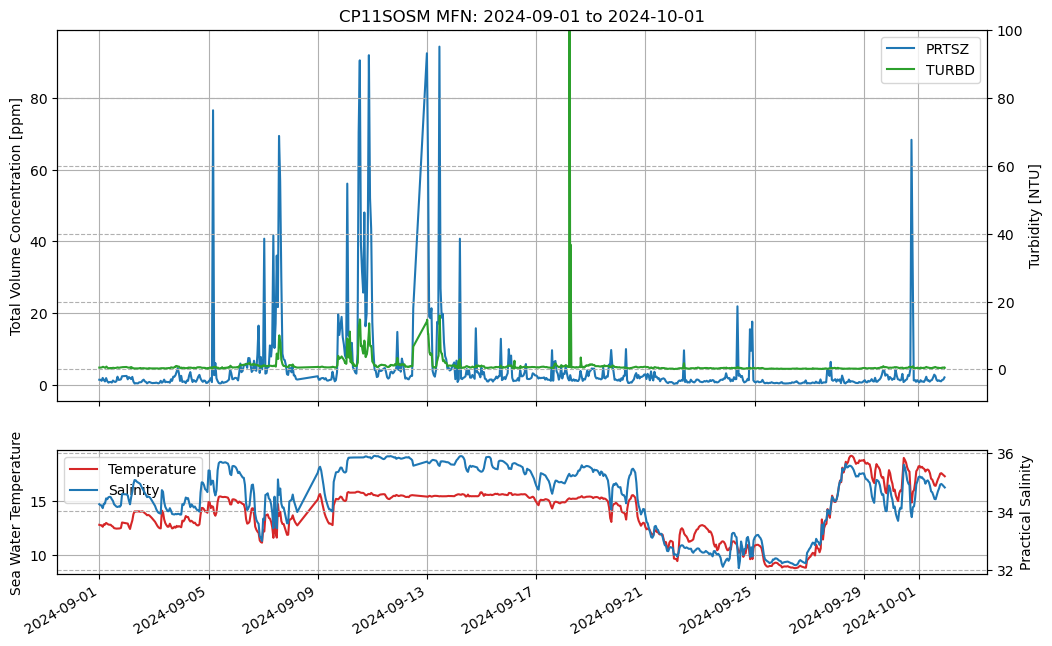

In [202]:
# Plot some of the data and see if anything matches

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (12, 8))

# Limit time to a certain time range
t1 = '2024-09-01'
t2 = '2024-10-01'

p1, = ax1.plot(burst.sel(time=slice(t1,t2))['time'], burst.sel(time=slice(t1,t2))['total_volume_concentration'], label='MFN PRTSZ')
ax1.set_ylabel('Total Volume Concentration [ppm]')

ax12 = ax1.twinx()
p2, = ax12.plot(turbd_mfn_avg.sel(time=slice(t1,t2))['time'], turbd_mfn_avg.sel(time=slice(t1,t2))['turbidity'], color="tab:green", label='MFN TURBD')
ax12.set_ylim(ymax=100)
ax12.set_ylabel('Turbidity [NTU]')

ax1.grid()
ax12.grid(linestyle='--')
ax12.legend([p1, p2], ['PRTSZ','TURBD'])


# Plot the CTDBP data
p3, = ax2.plot(ctdbp_mfn.sel(time=slice(t1,t2))['time'], ctdbp_mfn.sel(time=slice(t1,t2))['sea_water_temperature'], color="tab:red")
ax22 = ax2.twinx()
p4, = ax22.plot(ctdbp_mfn.sel(time=slice(t1,t2))['time'], ctdbp_mfn.sel(time=slice(t1,t2))['sea_water_practical_salinity'], color="tab:blue")

ax2.grid()
ax22.grid(linestyle="--")
ax2.set_ylabel('Sea Water Temperature')
ax22.set_ylabel('Practical Salinity')
ax2.legend([p3, p4], ['Temperature', 'Salinity'])
fig.autofmt_xdate()

# Set title
ax1.set_title(f'CP11SOSM MFN: {t1} to {t2}')

In [160]:
tvc = burst.sel(time=slice(t1,t2))['total_volume_concentration'].to_dataframe()
tur = turbd_mfn_avg.sel(time=slice(t1,t2))['turbidity'].to_dataframe()
df = tvc.merge(tur, left_index=True, right_index=True)
df.corr(method='spearman')

,total_volume_concentration,turbidity
total_volume_concentration,1.000000,0.863761
turbidity,0.863761,1.000000


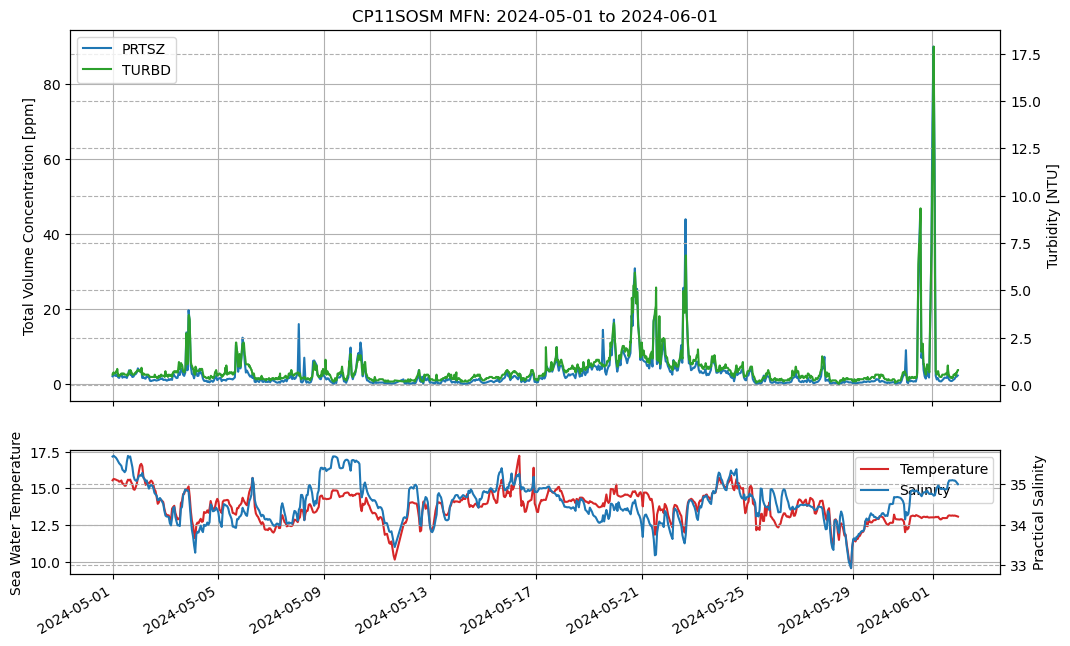

In [201]:
# Plot some of the data and see if anything matches

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (12, 8))

# Limit time to a certain time range
t1 = '2024-05-01'
t2 = '2024-06-01'

p1, = ax1.plot(burst.sel(time=slice(t1,t2))['time'], burst.sel(time=slice(t1,t2))['total_volume_concentration'], label='MFN PRTSZ')
ax1.set_ylabel('Total Volume Concentration [ppm]')

ax12 = ax1.twinx()
p2, = ax12.plot(turbd_mfn_avg.sel(time=slice(t1,t2))['time'], turbd_mfn_avg.sel(time=slice(t1,t2))['turbidity'], color="tab:green", label='MFN TURBD')
#ax12.set_ylim(ymax=100)
ax12.set_ylabel('Turbidity [NTU]')

ax1.grid()
ax12.grid(linestyle='--')
ax12.legend([p1, p2], ['PRTSZ','TURBD'])
ax1.set_title(f'CP11SOSM MFN: {t1} to {t2}') 

# Plot the CTDBP data
p3, = ax2.plot(ctdbp_mfn.sel(time=slice(t1,t2))['time'], ctdbp_mfn.sel(time=slice(t1,t2))['sea_water_temperature'], color="tab:red")
ax22 = ax2.twinx()
p4, = ax22.plot(ctdbp_mfn.sel(time=slice(t1,t2))['time'], ctdbp_mfn.sel(time=slice(t1,t2))['sea_water_practical_salinity'], color="tab:blue")

ax2.grid()
ax2.legend([p3, p4], ['Temperature', 'Salinity'])
ax22.grid(linestyle="--")
ax2.set_ylabel('Sea Water Temperature')
ax22.set_ylabel('Practical Salinity')
fig.autofmt_xdate()

In [164]:
tvc = burst.sel(time=slice(t1,t2))['total_volume_concentration'].to_dataframe()
tur = turbd_mfn_avg.sel(time=slice(t1,t2))['turbidity'].to_dataframe()
df = tvc.merge(tur, left_index=True, right_index=True)
df.corr(method='spearman')

,total_volume_concentration,turbidity
total_volume_concentration,1.000000,0.960511
turbidity,0.960511,1.000000


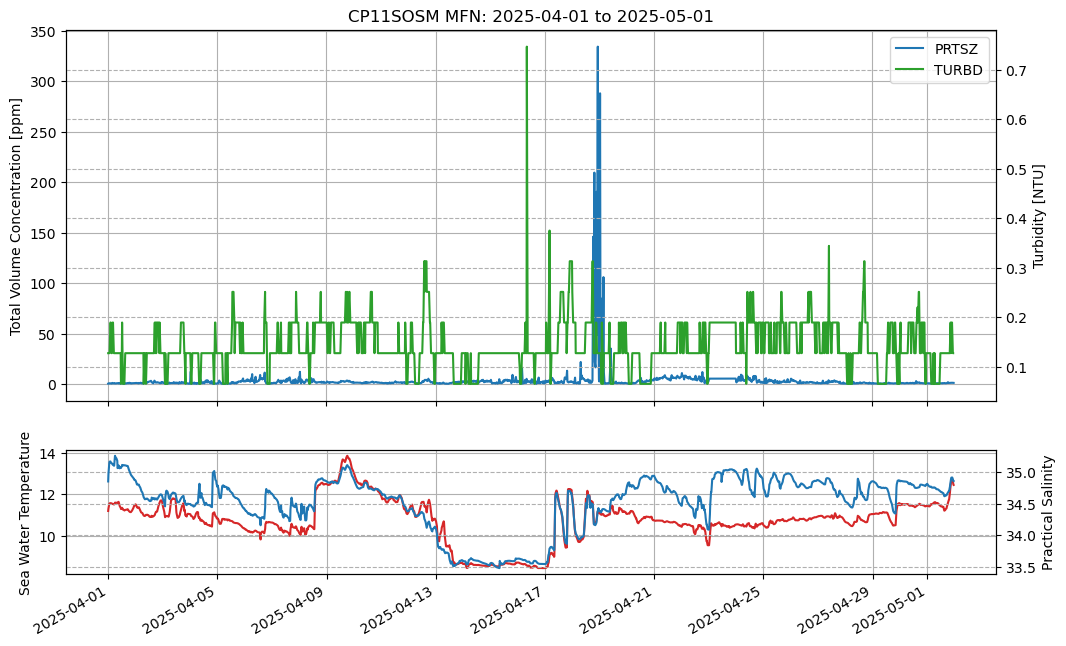

In [275]:
# Plot some of the data and see if anything matches

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, gridspec_kw={'height_ratios': [3, 1]}, figsize = (12, 8))

# Limit time to a certain time range
t1 = '2025-04-01'
t2 = '2025-05-01'

p1, = ax1.plot(burst.sel(time=slice(t1,t2))['time'], burst.sel(time=slice(t1,t2))['total_volume_concentration'], label='MFN PRTSZ')
ax1.set_ylabel('Total Volume Concentration [ppm]')

ax12 = ax1.twinx()
p2, = ax12.plot(turbd_mfn_avg.sel(time=slice(t1,t2))['time'], turbd_mfn_avg.sel(time=slice(t1,t2))['turbidity'], color="tab:green", label='MFN TURBD')
#ax12.set_ylim(ymax=100)
ax12.set_ylabel('Turbidity [NTU]')

ax1.grid()
ax12.grid(linestyle='--')
ax12.legend([p1, p2], ['PRTSZ','TURBD'])
ax1.set_title(f'CP11SOSM MFN: {t1} to {t2}')

# Plot the CTDBP data
ax2.plot(ctdbp_mfn.sel(time=slice(t1,t2))['time'], ctdbp_mfn.sel(time=slice(t1,t2))['sea_water_temperature'], color="tab:red")
ax22 = ax2.twinx()
ax22.plot(ctdbp_mfn.sel(time=slice(t1,t2))['time'], ctdbp_mfn.sel(time=slice(t1,t2))['sea_water_practical_salinity'], color="tab:blue")

ax2.grid()
ax22.grid(linestyle="--")
ax2.set_ylabel('Sea Water Temperature')
ax22.set_ylabel('Practical Salinity')
fig.autofmt_xdate()

In [276]:
tvc = burst.sel(time=slice(t1,t2))['total_volume_concentration'].to_dataframe()
tur = turbd_mfn_avg.sel(time=slice(t1,t2))['turbidity'].to_dataframe()
df = tvc.merge(tur, left_index=True, right_index=True)
df.corr(method='spearman')

,total_volume_concentration,turbidity
total_volume_concentration,1.00000,0.23028
turbidity,0.23028,1.00000


In [212]:
deployment_df = burst['deployment'].to_dataframe()
deployment_df['stuff'] = 1
deployment_df

,deployment,stuff
time,,
2024-04-05 14:00:00,1.0,1
2024-04-05 15:00:00,1.0,1
2024-04-05 16:00:00,1.0,1
2024-04-05 17:00:00,1.0,1
2024-04-05 18:00:00,1.0,1
...,...,...
2025-05-09 22:00:00,2.0,1
2025-05-09 22:40:00,2.0,1
2025-05-09 23:00:00,2.0,1


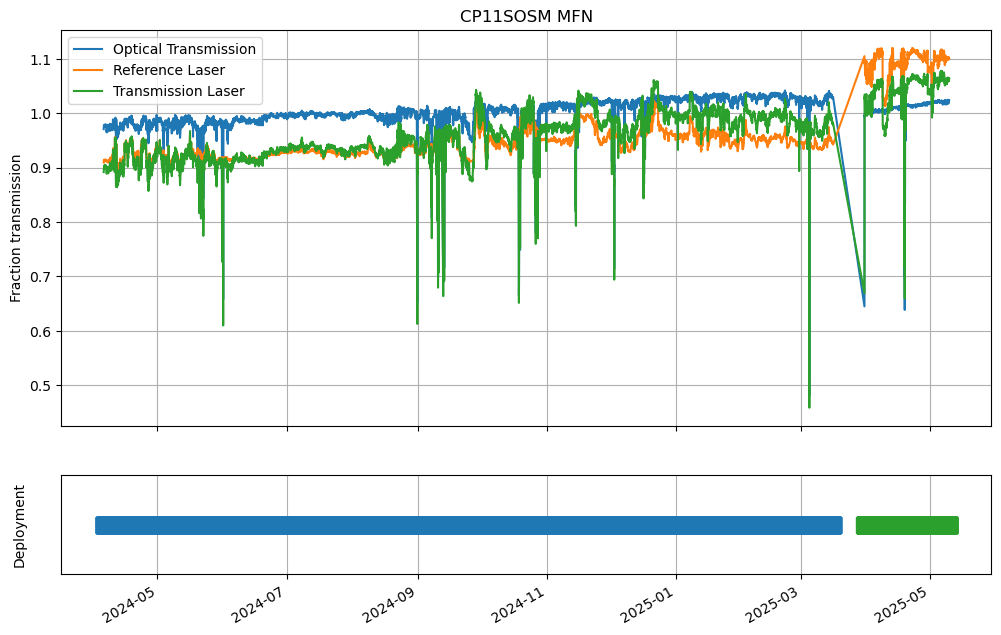

In [233]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,8), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

ax1.plot(burst['time'], burst['computed_optical_transmission'], label='Optical Transmission')
ax1.plot(burst['time'], burst['laser_reference_sensor'], label='Reference Laser')
ax1.plot(burst['time'], burst['laser_transmission_sensor'], label='Transmission Laser')
ax1.grid()
ax1.set_ylabel('Fraction transmission')
ax1.legend()
ax1.set_title('CP11SOSM MFN')

d1 = deployment_df['deployment'] == 1
d2 = deployment_df['deployment'] == 2

ax2.plot(deployment_df.index[d1], deployment_df['stuff'][d1], marker='s', markersize='12', color="tab:blue", label='Deployment 1')
ax2.plot(deployment_df.index[d2], deployment_df['stuff'][d2], marker='s', markersize='12', color="tab:green", label='Deployment 2')
ax2.grid(axis='x')
ax2.set_yticks([])
ax2.set_ylabel('Deployment', labelpad=25)
fig.autofmt_xdate()

In [274]:
prtsz_mfn_avg.where(prtsz_mfn_avg.deployment == 2, drop=True)

<xarray.Dataset>
Dimensions:                                       (time: 1876, bin: 36,
                                                   particle_upper_size_bins_dim_0: 36,
                                                   stats: 3)
Coordinates:
  * particle_upper_size_bins_dim_0                (particle_upper_size_bins_dim_0) int32 ...
  * bin                                           (bin) int32 0 1 2 ... 33 34 35
  * time                                          (time) datetime64[ns] 2025-...
  * stats                                         (stats) int32 0 1 2
Data variables: (12/19)
    volume_concentration                          (time, bin) float32 0.0 ......
    total_volume_concentration                    (time) float64 172.2 ... 0....
    computed_optical_transmission                 (time) float64 0.645 ... 1.024
    computed_optical_transmission_qartod_results  (time) float64 3.0 3.0 ... 4.0
    laser_transmission_sensor                     (time) float64 0.6693 ... 1...
    sea_water_temperature_qartod_results          (time) float64 1.0 1.0 ... 1.0
    ...                                            ...
    particle_upper_size_bins                      (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                 (time) float64 0.0 0.0 ... 0.0
    relative_humidity                             (time) float64 57.0 ... 57.0
    depth                                         (time) float64 100.6 ... 100.3
    sea_water_temperature                         (time) float64 10.84 ... 11.07
    turbidity_burst_stats                         (time, stats) float64 1.177...
Attributes: (12/69)
    node:                               MFD36
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857

### Look at the NSIF data

In [234]:
prtsz_nsif_avg = prtsz_datalogger(prtsz_nsif)
prtsz_nsif_avg

<xarray.Dataset>
Dimensions:                                       (time: 12938, bin: 36,
                                                   particle_upper_size_bins_dim_0: 36,
                                                   stats: 3)
Coordinates:
  * particle_upper_size_bins_dim_0                (particle_upper_size_bins_dim_0) int32 ...
  * bin                                           (bin) int32 0 1 2 ... 33 34 35
  * time                                          (time) datetime64[ns] 2024-...
  * stats                                         (stats) int32 0 1 2
Data variables: (12/19)
    volume_concentration                          (time, bin) float32 0.0 ......
    total_volume_concentration                    (time) float64 12.12 ... 0....
    computed_optical_transmission                 (time) float64 0.865 ... 1.007
    computed_optical_transmission_qartod_results  (time) float64 1.0 1.0 ... 4.0
    laser_transmission_sensor                     (time) float64 0.8347 ... 1...
    sea_water_temperature_qartod_results          (time) float64 1.0 1.0 ... 1.0
    ...                                            ...
    particle_upper_size_bins                      (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                 (time) float64 3.0 3.0 ... 4.0
    relative_humidity                             (time) float64 45.0 ... 33.0
    depth                                         (time) float64 7.72 ... 7.43
    sea_water_temperature                         (time) float64 11.25 ... 24.15
    turbidity_burst_stats                         (time, stats) float64 3.506...
Attributes: (12/69)
    node:                               RID26
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857

In [235]:
deployment_df = prtsz_nsif_avg['deployment'].to_dataframe()
deployment_df['stuff'] = 1
deployment_df

,deployment,stuff
time,,
2024-04-05 14:00:00,1.0,1
2024-04-05 14:20:00,1.0,1
2024-04-05 14:40:00,1.0,1
2024-04-05 15:00:00,1.0,1
2024-04-05 15:20:00,1.0,1
...,...,...
2025-05-09 23:00:00,2.0,1
2025-05-09 23:20:00,2.0,1
2025-05-09 23:40:00,2.0,1


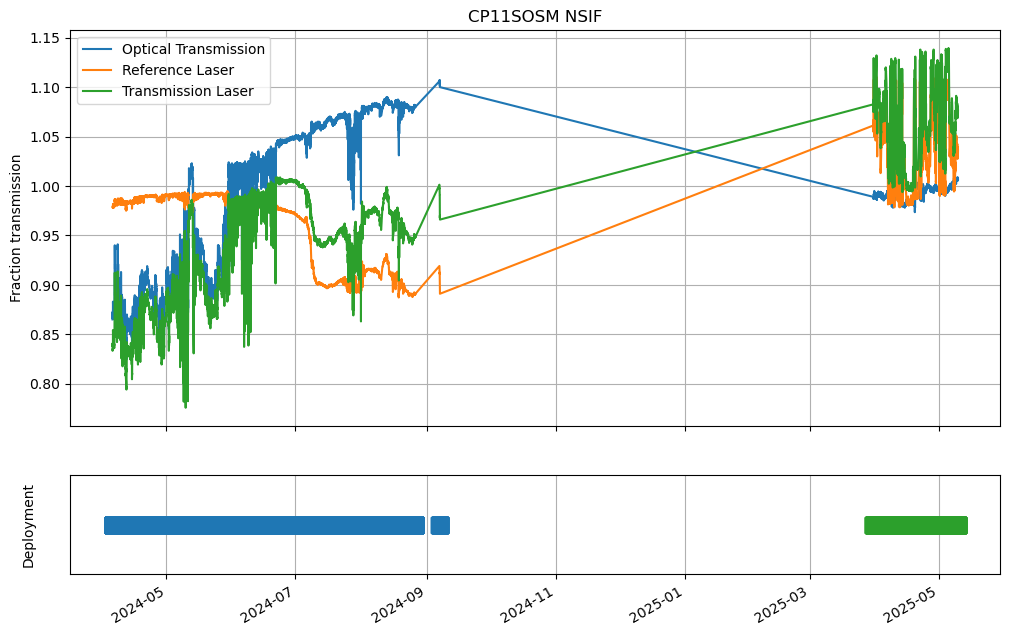

In [238]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12,8), gridspec_kw={'height_ratios': [4, 1]}, sharex=True)

ax1.plot(prtsz_nsif_avg['time'], prtsz_nsif_avg['computed_optical_transmission'], label='Optical Transmission')
ax1.plot(prtsz_nsif_avg['time'], prtsz_nsif_avg['laser_reference_sensor'], label='Reference Laser')
ax1.plot(prtsz_nsif_avg['time'], prtsz_nsif_avg['laser_transmission_sensor'], label='Transmission Laser')
ax1.grid()
ax1.set_ylabel('Fraction transmission')
ax1.legend()
ax1.set_title('CP11SOSM NSIF')

d1 = deployment_df['deployment'] == 1
d2 = deployment_df['deployment'] == 2

ax2.plot(deployment_df.index[d1], deployment_df['stuff'][d1], marker='s', markersize='12', linestyle='', color="tab:blue", label='Deployment 1')
ax2.plot(deployment_df.index[d2], deployment_df['stuff'][d2], marker='s', markersize='12', linestyle='', color="tab:green", label='Deployment 2')
ax2.grid(axis='x')
ax2.set_yticks([])
ax2.set_ylabel('Deployment', labelpad=25)
fig.autofmt_xdate()

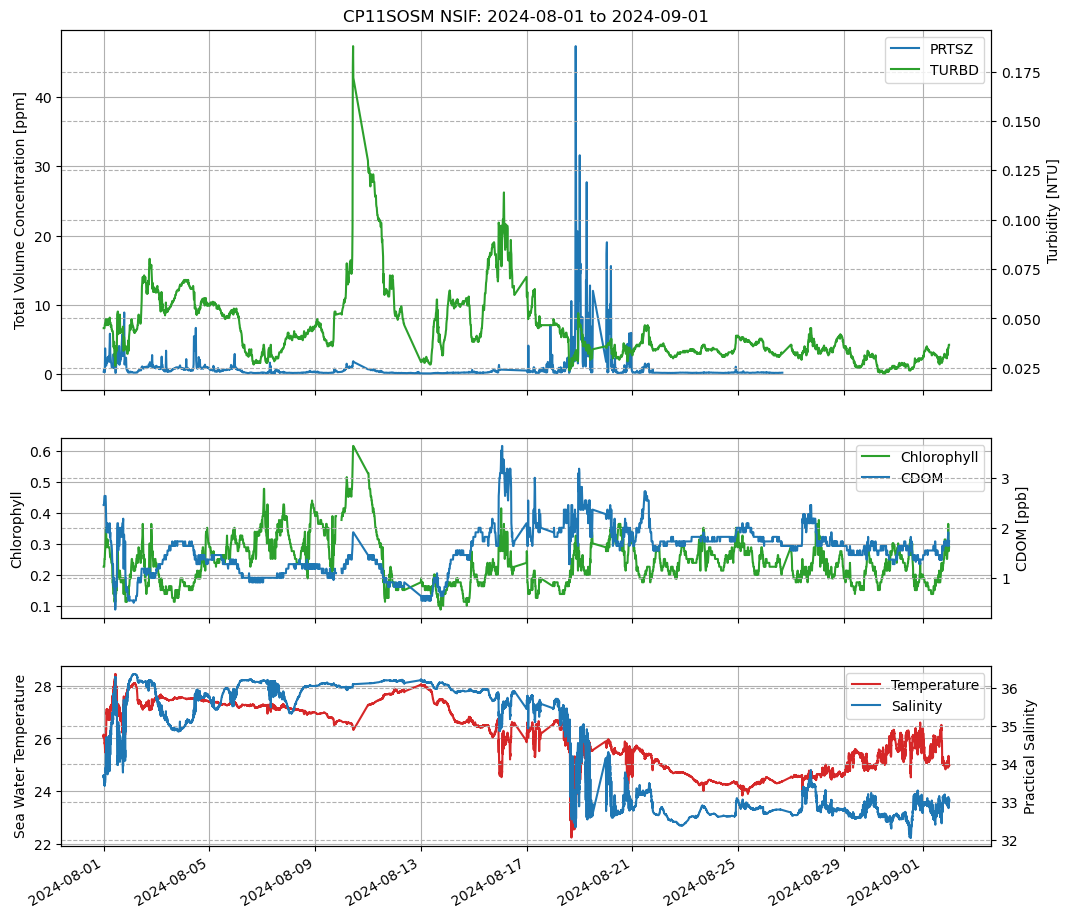

In [268]:
# Plot some of the data and see if anything matches

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, gridspec_kw={'height_ratios': [2, 1, 1]}, figsize = (12, 12), sharex=True)

# Limit time to a certain time range
t1 = '2024-08-01'
t2 = '2024-09-01'

p1, = ax1.plot(prtsz_nsif_avg.sel(time=slice(t1,t2))['time'], prtsz_nsif_avg.sel(time=slice(t1,t2))['total_volume_concentration'], label='MFN PRTSZ')
ax1.set_ylabel('Total Volume Concentration [ppm]')

ax12 = ax1.twinx()
p2, = ax12.plot(turbd_nsif_avg.sel(time=slice(t1,t2))['time'], turbd_nsif_avg.sel(time=slice(t1,t2))['turbidity'], color="tab:green", label='MFN TURBD')
#ax12.set_ylim(ymax=100)
ax12.set_ylabel('Turbidity [NTU]')

ax1.grid()
ax12.grid(linestyle='--')
ax12.legend([p1, p2], ['PRTSZ','TURBD'])
ax1.set_title(f'CP11SOSM NSIF: {t1} to {t2}')

# Plot the FLORT data
p3, = ax2.plot(flort_nsif_avg.sel(time=slice(t1,t2))['time'], flort_nsif_avg.sel(time=slice(t1,t2))['estimated_chlorophyll'], color="tab:green")
ax22 = ax2.twinx()
#ax23 = ax2.twinx()
#ax23.spines.right.set_position(("axes",1.1))
p4, = ax22.plot(flort_nsif_avg.sel(time=slice(t1,t2))['time'], flort_nsif_avg.sel(time=slice(t1,t2))['fluorometric_cdom'], color="tab:blue")
#p5, = ax23.plot(flort_nsif_avg.sel(time=slice(t1,t2))['time'], flort_nsif_avg.sel(time=slice(t1,t2))['estimated_chlorophyll'], color="tab:green")
ax2.grid()
ax22.grid(linestyle="--")
ax2.set_ylabel('Chlorophyll')
ax22.set_ylabel('CDOM [ppb]')
#ax23.set_ylabel('Chlorophyll')

ax2.legend([p3, p4], ['Chlorophyll','CDOM'])

# Plot the CTDBP data
p6, =ax3.plot(ctdbp_nsif.sel(time=slice(t1,t2))['time'], ctdbp_nsif.sel(time=slice(t1,t2))['sea_water_temperature'], color="tab:red")
ax32 = ax3.twinx()
p7, = ax32.plot(ctdbp_nsif.sel(time=slice(t1,t2))['time'], ctdbp_nsif.sel(time=slice(t1,t2))['sea_water_practical_salinity'], color="tab:blue")

ax3.legend([p6, p7],['Temperature','Salinity'])
ax3.grid()
ax32.grid(linestyle="--")
ax3.set_ylabel('Sea Water Temperature')
ax32.set_ylabel('Practical Salinity')
fig.autofmt_xdate()

In [269]:
a = prtsz_nsif_avg.sel(time=slice(t1,t2))['total_volume_concentration'].to_dataframe()
b = turbd_nsif_avg.sel(time=slice(t1,t2))['turbidity'].to_dataframe()
c = flort_nsif_avg.sel(time=slice(t1,t2))[['fluorometric_cdom','estimated_chlorophyll']].to_dataframe()
df = a.merge(b, left_index=True, right_index=True).merge(c, left_index=True, right_index=True)
df

,total_volume_concentration,turbidity,fluorometric_cdom,estimated_chlorophyll
time,,,,
2024-08-01 00:00:00,0.38325,0.045076,2.45241,0.22662
2024-08-01 01:00:00,0.30835,0.046604,2.63407,0.25180
2024-08-01 02:00:00,1.35745,0.049660,2.45241,0.35252
2024-08-01 03:00:00,1.60435,0.047368,1.90743,0.28957
2024-08-01 04:00:00,2.30455,0.046604,1.90743,0.28957
...,...,...,...,...
2024-08-26 12:00:00,0.19490,0.031324,1.81660,0.25180
2024-08-26 13:00:00,0.20920,0.030560,1.72577,0.25180
2024-08-26 14:00:00,0.23300,0.031324,1.72577,0.25180


In [270]:
import scipy as sp

In [271]:
def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = sp.stats.spearmanr(tmp[r], tmp[c])[1]
    return p

In [272]:
df.corr(method='spearman')

,total_volume_concentration,turbidity,fluorometric_cdom,estimated_chlorophyll
total_volume_concentration,1.000000,0.426929,0.268370,0.086746
turbidity,0.426929,1.000000,-0.089168,-0.177349
fluorometric_cdom,0.268370,-0.089168,1.000000,-0.020704
estimated_chlorophyll,0.086746,-0.177349,-0.020704,1.000000


In [273]:
r_pvalues(df)

,total_volume_concentration,turbidity,fluorometric_cdom,estimated_chlorophyll
total_volume_concentration,0.0,0.0,0.0,0.044506
turbidity,0.0,0.0,0.038865,0.000036
fluorometric_cdom,0.0,0.038865,0.0,0.632145
estimated_chlorophyll,0.044506,0.000036,0.632145,0.0


In [250]:
sp.stats.spearmanr(df['total_volume_concentration'], df['turbidity'])

SignificanceResult(statistic=0.3862297538647068, pvalue=4.045396373166186e-150)

In [138]:
from sklearn.linear_model import LinearRegression


transmission = burst[['computed_optical_transmission', 'laser_reference_sensor', 'laser_transmission_sensor']].to_dataframe()

# Convert data to ordinal
transmission['date_ordinal'] = transmission.index.values
transmission['date_ordinal'] = transmission['date_ordinal'].apply(
    lambda x: x.toordinal() + (x.hour / 24) + (x.minute / 1440) + (x.second / 86400)
)

# Prepare features
X = transmission['date_ordinal'].values.reshape(-1, 1)
y_cot = transmission['computed_optical_transmission'].values.reshape(-1, 1)
y_ref = transmission['laser_reference_sensor'].values.reshape(-1, 1)
y_tran = transmission['laser_transmission_sensor'].values.reshape(-1, 1)

# Fit the model
model_cot = LinearRegression()
model_cot.fit(X,y_cot)

model_ref = LinearRegression()
model_ref.fit(X, y_ref)

model_trans = LinearRegression()
model_trans.fit(X, y_tran)



LinearRegression()

In [87]:
# Example time series
x = pd.Series([1, 2, 3, 4, 5])
y = pd.Series([5, 4, 3, 2, 1])

# Cross-correlation
cross_corr = [x.corr(y.shift(lag)) for lag in range(-len(x) + 1, len(x))]

lags = range(-len(x) + 1, len(x))
print("Cross-correlation:", cross_corr)
print("Lags:", list(lags))

Cross-correlation: [nan, -0.9999999999999999, -1.0, -1.0, -0.9999999999999999, -1.0, -1.0, -0.9999999999999999, nan]
Lags: [-4, -3, -2, -1, 0, 1, 2, 3, 4]


/home/jovyan/.conda/envs/ooi/lib/python3.10/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/jovyan/.conda/envs/ooi/lib/python3.10/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [27]:
turbd_mfn['time'] + np.timedelta64(450, 's')

<xarray.DataArray 'time' (time: 5297684)>
array(['2024-04-05T14:07:42.246999552', '2024-04-05T14:07:43.374000128',
       '2024-04-05T14:07:44.501999616', ...,
       '2025-05-10T00:14:22.867000320', '2025-05-10T00:14:23.998000128',
       '2025-05-10T00:14:25.121000448'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2024-04-05T14:00:12.246999552 ... 2025-05-...

In [34]:
prtsz_mfn

<xarray.Dataset>
Dimensions:                                        (time: 1309092, bin: 36,
                                                    particle_upper_size_bins_dim_0: 36)
Coordinates:
  * particle_upper_size_bins_dim_0                 (particle_upper_size_bins_dim_0) int32 ...
  * bin                                            (bin) int32 0 1 2 ... 34 35
  * time                                           (time) datetime64[ns] 2024...
Data variables: (12/21)
    volume_concentration                           (time, bin) float32 0.0 .....
    total_volume_concentration                     (time) float32 99.26 ... 0...
    computed_optical_transmission                  (time) float32 0.903 ... 1...
    computed_optical_transmission_qartod_executed  (time) object '1' '1' ... '4'
    computed_optical_transmission_qartod_results   (time) uint8 1 1 1 ... 4 4 4
    laser_transmission_sensor                      (time) float32 0.8284 ... ...
    ...                                             ...
    supply_voltage                                 (time) float32 23.86 ... 2...
    particle_upper_size_bins                       (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                  (time) int32 6 7 7 ... 0 0 0
    relative_humidity                              (time) uint8 16 16 ... 57 56
    depth                                          (time) float32 102.9 ... 1...
    sea_water_temperature                          (time) float32 13.33 ... 1...
Attributes: (12/69)
    node:                               MFD36
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857

In [29]:
def prtsz_datalogger(ds, burst=True):
    

<xarray.Dataset>
Dimensions:                                        (time: 1309092, bin: 36,
                                                    particle_upper_size_bins_dim_0: 36)
Coordinates:
  * particle_upper_size_bins_dim_0                 (particle_upper_size_bins_dim_0) int32 ...
  * bin                                            (bin) int32 0 1 2 ... 34 35
  * time                                           (time) datetime64[ns] 2024...
Data variables: (12/21)
    volume_concentration                           (time, bin) float32 0.0 .....
    total_volume_concentration                     (time) float32 99.26 ... 0...
    computed_optical_transmission                  (time) float32 0.903 ... 1...
    computed_optical_transmission_qartod_executed  (time) object '1' '1' ... '4'
    computed_optical_transmission_qartod_results   (time) uint8 1 1 1 ... 4 4 4
    laser_transmission_sensor                      (time) float32 0.8284 ... ...
    ...                                             ...
    supply_voltage                                 (time) float32 23.86 ... 2...
    particle_upper_size_bins                       (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                  (time) int32 6 7 7 ... 0 0 0
    relative_humidity                              (time) uint8 16 16 ... 57 56
    depth                                          (time) float32 102.9 ... 1...
    sea_water_temperature                          (time) float32 13.33 ... 1...
Attributes: (12/69)
    node:                               MFD36
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857

In [60]:
burst

<xarray.Dataset>
Dimensions:                                       (time: 10084, bin: 36,
                                                   particle_upper_size_bins_dim_0: 36,
                                                   stats: 3)
Coordinates:
  * particle_upper_size_bins_dim_0                (particle_upper_size_bins_dim_0) int32 ...
  * bin                                           (bin) int32 0 1 2 ... 33 34 35
  * time                                          (time) datetime64[ns] 2024-...
  * stats                                         (stats) int32 0 1 2
Data variables: (12/19)
    volume_concentration                          (time, bin) float32 0.0 ......
    total_volume_concentration                    (time) float64 3.888 ... 0....
    computed_optical_transmission                 (time) float64 0.971 ... 1.024
    computed_optical_transmission_qartod_results  (time) float64 1.0 1.0 ... 4.0
    laser_transmission_sensor                     (time) float64 0.892 ... 1.064
    sea_water_temperature_qartod_results          (time) float64 1.0 1.0 ... 1.0
    ...                                            ...
    particle_upper_size_bins                      (time, particle_upper_size_bins_dim_0) float64 ...
    ambient_light                                 (time) float64 7.0 7.0 ... 0.0
    relative_humidity                             (time) float64 15.0 ... 57.0
    depth                                         (time) float64 102.5 ... 100.3
    sea_water_temperature                         (time) float64 13.32 ... 11.07
    total_volume_concentration_burst_stats        (time, stats) float64 1.383...
Attributes: (12/69)
    node:                               MFD36
    comment:                            Data produced by the OOI M2M API and ...
    publisher_email:                    
    sourceUrl:                          http://oceanobservatories.org/
    collection_method:                  telemetered
    stream:                             prtsz_a_instrument
    ...                                 ...
    geospatial_lon_resolution:          0.1
    geospatial_vertical_units:          meters
    geospatial_vertical_resolution:     0.1
    geospatial_vertical_positive:       down
    lat:                                35.72382
    lon:                                -74.84857